In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in cleaned CSV
merged_data = pd.read_csv('Cleaned_Dataframes/Merged_Dataframes_cleaned.csv')
merged_data.head()

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population
0,Alabama,15.25,77.65,321.2,108.5,212.6
1,Alaska,15.60,65.55,261.7,67.9,193.9
2,Arizona,15.00,72.20,249.3,76.1,173.2
3,Arkansas,12.70,80.00,351.0,121.7,229.3
4,California,10.55,74.65,203.8,70.8,133.1


In [3]:
# Describe data per column
stat_summ_unis = merged_data["Percentage of Uninsured Adults"].describe()
stat_summ_doc = merged_data["Percentage of Adults visit Reg Doctors"].describe()
stat_summ_avoi = merged_data["Avoidable Deaths per 100k Population"].describe()
stat_summ_treat = merged_data["Treatable Deaths per 100k Population"].describe()
stat_summ_prev = merged_data["Preventable Deaths per 100k Population"].describe()

print('Summary Statistics')
print(stat_summ_unis)
print(stat_summ_doc)
print(stat_summ_avoi)
print(stat_summ_treat)
print(stat_summ_prev)

Summary Statistics
count    51.000000
mean     11.609804
std       4.407358
min       4.100000
25%       8.300000
50%      11.300000
75%      14.900000
max      24.200000
Name: Percentage of Uninsured Adults, dtype: float64
count    51.000000
mean     77.522549
std       5.502566
min      65.550000
25%      73.650000
50%      77.500000
75%      81.725000
max      87.250000
Name: Percentage of Adults visit Reg Doctors, dtype: float64
count     51.000000
mean     260.709804
std       51.413665
min      185.900000
25%      222.050000
50%      252.200000
75%      295.600000
max      385.600000
Name: Avoidable Deaths per 100k Population, dtype: float64
count     51.000000
mean      84.354902
std       18.685335
min       59.500000
25%       70.050000
50%       80.800000
75%       95.200000
max      137.500000
Name: Treatable Deaths per 100k Population, dtype: float64
count     51.000000
mean     176.349020
std       34.608296
min      126.400000
25%      151.900000
50%      173.200000
75%  

In [4]:
# Data variance
var_unis = merged_data["Percentage of Uninsured Adults"].var()
var_doc = merged_data["Percentage of Adults visit Reg Doctors"].var()
var_avoi = merged_data["Avoidable Deaths per 100k Population"].var()
var_treat = merged_data["Treatable Deaths per 100k Population"].var()
var_prev = merged_data["Preventable Deaths per 100k Population"].var()

print('Variance:')
print(f'% Uninsured Adults: {var_unis}')
print(f'% Adults with Primary Care Doc: {var_doc}')
print(f'Avoidable Deaths: {var_avoi}')
print(f'Treatable Deaths: {var_treat}')
print(f'Preventable Deaths: {var_prev}')

Variance:
% Uninsured Adults: 19.424801960784308
% Adults with Primary Care Doc: 30.27823137254904
Avoidable Deaths: 2643.3649019607838
Treatable Deaths: 349.1417254901961
Preventable Deaths: 1197.7341490196081


In [5]:
# Sort the data set low to high based on desired column
# AFTER continuing on - I realize it might've been better to make these their own dataframes - not redoing it now
unis_sorted = merged_data.sort_values("Percentage of Uninsured Adults")
doc_sorted = merged_data.sort_values("Percentage of Adults visit Reg Doctors")
avoi_sorted = merged_data.sort_values("Avoidable Deaths per 100k Population")
treat_sorted = merged_data.sort_values("Treatable Deaths per 100k Population")
prev_sorted = merged_data.sort_values("Preventable Deaths per 100k Population")

In [6]:
# confirm sorting is low to high 
unis_sorted.head(10)

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population
21,Massachusetts,4.10,86.95,196.5,59.6,136.9
8,District of Columbia,4.20,77.25,321.7,109.2,212.4
11,Hawaii,5.75,84.20,209.6,79.4,130.2
39,Rhode Island,5.85,85.70,222.7,69.3,153.4
45,Vermont,6.10,85.75,223.9,62.2,161.6
23,Minnesota,6.10,75.25,185.9,59.5,126.4
15,Iowa,6.95,82.55,237.5,79.1,158.4
32,New York,7.50,79.65,205.3,76.2,129.1
38,Pennsylvania,7.70,84.30,252.2,82.5,169.7
49,Wisconsin,7.85,82.45,224.8,72.3,152.5


In [28]:
# Adding DataFrames for state rankings per data set
# Resetting index and adding 1 so the index reflects the state ranking
# 51 "states" as the data sets have 50 states + District of Columbia 

#unis_sorted_df
unis_sorted_df = pd.DataFrame(unis_sorted[["State","Percentage of Uninsured Adults"]]).reset_index(drop=True)
unis_sorted_df.index = unis_sorted_df.index + 1

# doc_sorted
# doc_interum is used because the ranking for desired/undesired outcomes needs this data in reverse order
doc_interum_df = pd.DataFrame(doc_sorted[["State","Percentage of Adults visit Reg Doctors"]]) 
doc_sorted_df = doc_interum_df.iloc[::-1].reset_index(drop=True)
doc_sorted_df.index = doc_sorted_df.index + 1

#avoi_sorted
avoi_sorted_df = pd.DataFrame(avoi_sorted[["State","Avoidable Deaths per 100k Population"]]).reset_index(drop=True)
avoi_sorted_df.index = avoi_sorted_df.index + 1

#treat_sorted
treat_sorted_df = pd.DataFrame(treat_sorted[["State","Treatable Deaths per 100k Population"]]).reset_index(drop=True)
treat_sorted_df.index = treat_sorted_df.index + 1

#prev_sorted
prev_sorted_df = pd.DataFrame(prev_sorted[["State","Preventable Deaths per 100k Population"]]).reset_index(drop=True)
prev_sorted_df.index = prev_sorted_df.index + 1


print(unis_sorted_df.head())
print('')
print(doc_sorted_df.head())
print('')
print(avoi_sorted_df.head())
print('')
print(treat_sorted_df.head())
print('')
print(prev_sorted_df.head())
# Citation: Source of .iloc[::-1] = ChatGPT

                  State  Percentage of Uninsured Adults
1         Massachusetts                            4.10
2  District of Columbia                            4.20
3                Hawaii                            5.75
4          Rhode Island                            5.85
5               Vermont                            6.10

           State  Percentage of Adults visit Reg Doctors
1  New Hampshire                                   87.25
2  Massachusetts                                   86.95
3        Vermont                                   85.75
4   Rhode Island                                   85.70
5          Maine                                   85.35

           State  Avoidable Deaths per 100k Population
1      Minnesota                                 185.9
2           Utah                                 195.4
3  Massachusetts                                 196.5
4    Connecticut                                 197.9
5     California                             

In [33]:
# DESIRED OUTCOMES
print('Desired Outcomes - Top 5 States')
print("")
print('Fewest Uninsured (%)')
print(unis_sorted_df.head(6))
print('')
print('Most Adults with Primary Care Source (%)')
print(doc_sorted_df.head())
print('')
print('Fewest Avoidable Deaths (per 100k population)')
print(avoi_sorted_df.head())
print('')
print('Fewest Treatable Deaths (per 100k population)')
print(treat_sorted_df.head())
print('')
print('Fewest Preventable Deaths (per 100k population)')
print(prev_sorted_df.head())

Desired Outcomes - Top 5 States

Fewest Uninsured (%)
                  State  Percentage of Uninsured Adults
1         Massachusetts                            4.10
2  District of Columbia                            4.20
3                Hawaii                            5.75
4          Rhode Island                            5.85
5               Vermont                            6.10
6             Minnesota                            6.10

Most Adults with Primary Care Source (%)
           State  Percentage of Adults visit Reg Doctors
1  New Hampshire                                   87.25
2  Massachusetts                                   86.95
3        Vermont                                   85.75
4   Rhode Island                                   85.70
5          Maine                                   85.35

Fewest Avoidable Deaths (per 100k population)
           State  Avoidable Deaths per 100k Population
1      Minnesota                                 185.9
2           U

In [53]:
# UNDESIRED OUTCOMES
print('Undesired Outcomes - Worst 5 States')
print('')
print('Most Uninsured')
print(unis_tail_reverse)
print('')
#
doc_sorted_tail = doc_sorted_df.tail()
doc_tail_reverse = doc_sorted_tail.iloc[::-1]
print('Fewest Adults with Primary Care Source') 
print(doc_tail_reverse)
print('')
#
avoi_sorted_tail = avoi_sorted_df.tail()
avoi_tail_reverse = avoi_sorted_tail.iloc[::-1]
print('Most Avoidable Deaths' )
print(avoi_tail_reverse)
print('')
#
treat_sorted_tail = treat_sorted_df.tail()
treat_tail_reverse = treat_sorted_tail.iloc[::-1]
print('Most Treatable Deaths')
print(treat_tail_reverse)
print('')
#
prev_sorted_tail = prev_sorted_df.tail()
prev_tail_reverse = prev_sorted_tail.iloc[::-1]
print('Most Preventable Deaths')
print(prev_tail_reverse)

# Citation: Source of .iloc[::-1] = ChatGPT

Undesired Outcomes - Worst 5 States

Most Uninsured
          State  Percentage of Uninsured Adults
51        Texas                           24.20
50     Oklahoma                           20.55
49      Florida                           19.35
48  Mississippi                           19.05
47      Georgia                           19.00

Fewest Adults with Primary Care Source
         State  Percentage of Adults visit Reg Doctors
51      Alaska                                   65.55
50     Wyoming                                   67.45
49      Nevada                                   67.70
48       Texas                                   67.90
47  New Mexico                                   69.30

Most Avoidable Deaths
            State  Avoidable Deaths per 100k Population
51  West Virginia                                 385.6
50    Mississippi                                 379.0
49       Oklahoma                                 360.1
48       Arkansas                          

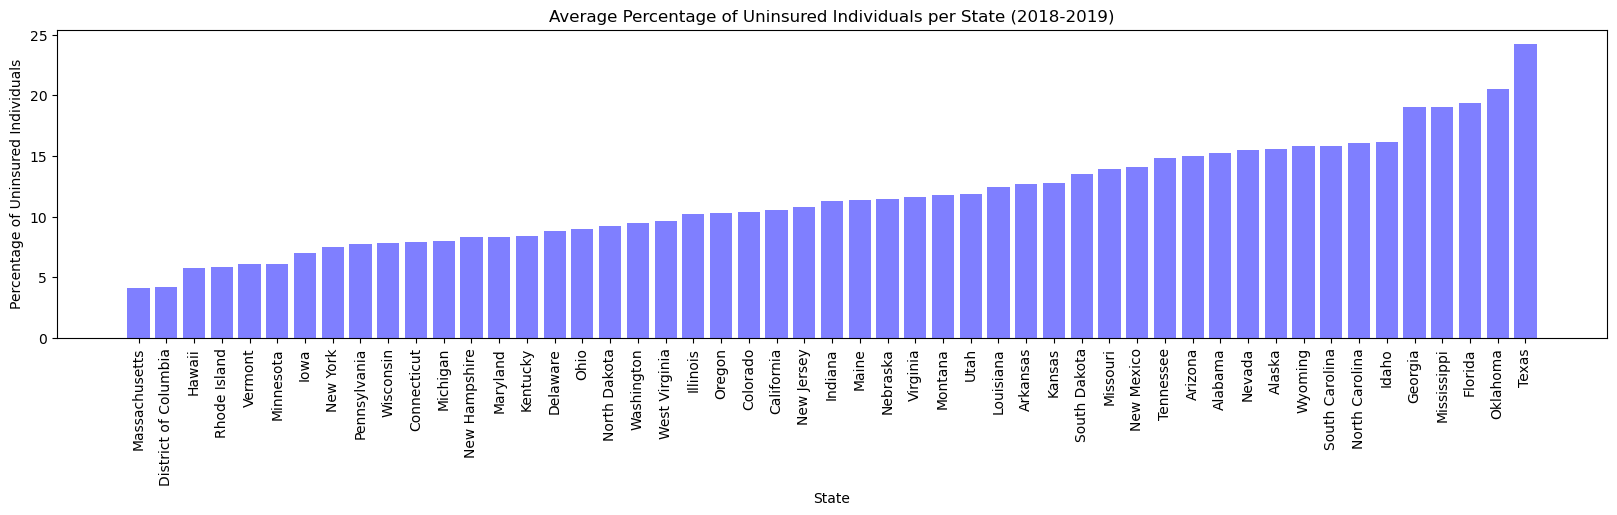

In [37]:
# Bar chart percentage of individuals per State least -> highest
x_axis = np.arange(len(unis_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, unis_sorted["Percentage of Uninsured Adults"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, unis_sorted["State"], rotation="vertical")
plt.title('Average Percentage of Uninsured Individuals per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Percentage of Uninsured Individuals')
plt.show()

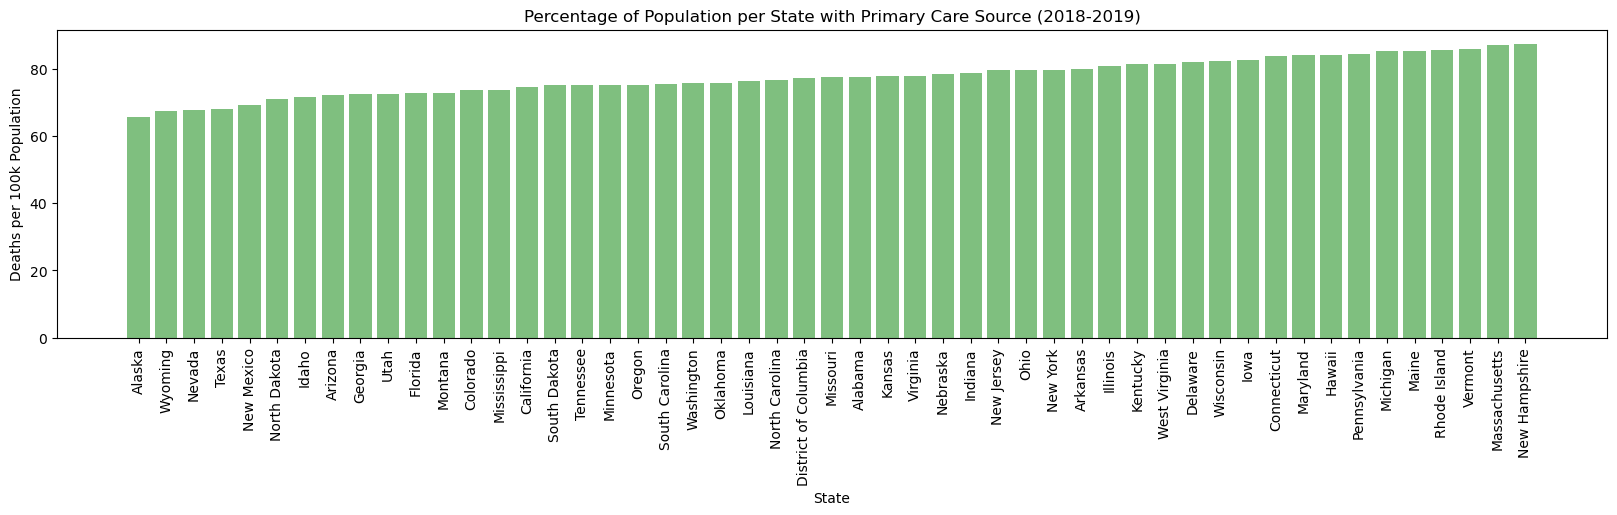

In [38]:
# Need to add bar chart for doc visits
x_axis = np.arange(len(doc_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, doc_sorted["Percentage of Adults visit Reg Doctors"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, doc_sorted["State"], rotation="vertical")
plt.title('Percentage of Population per State with Primary Care Source (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

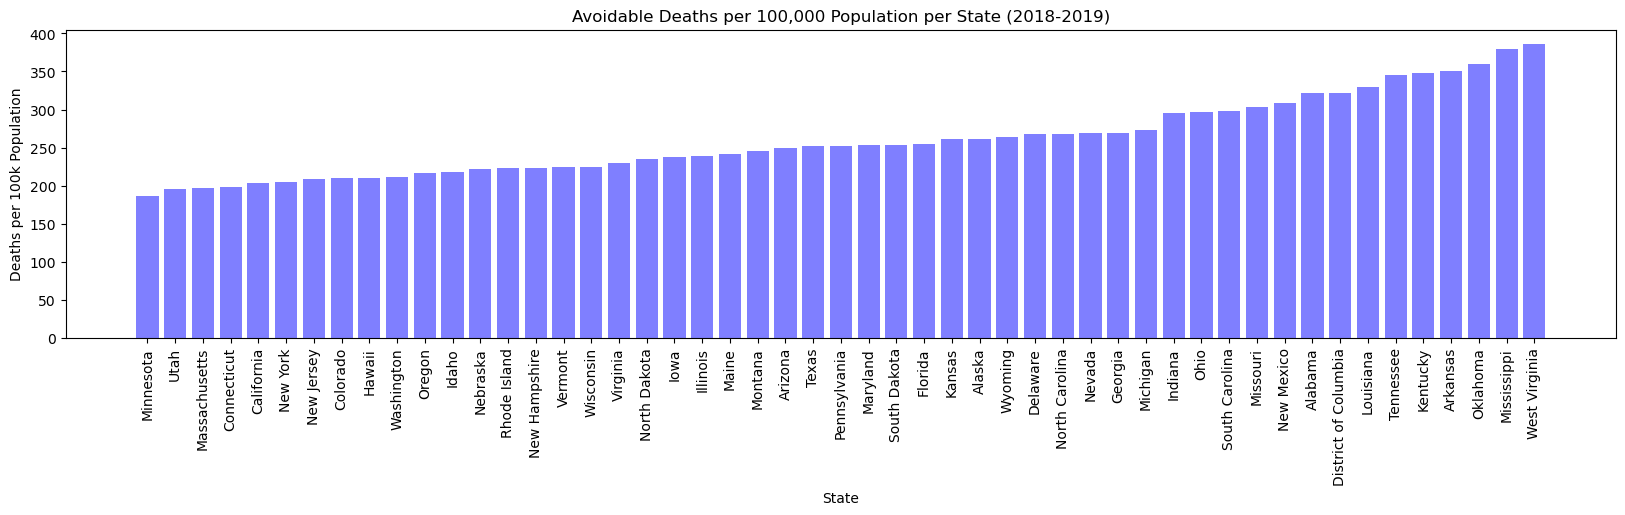

In [39]:
# Bar chart avoidable deaths per State least -> most
x_axis = np.arange(len(avoi_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, avoi_sorted["Avoidable Deaths per 100k Population"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, avoi_sorted["State"], rotation="vertical")
plt.title('Avoidable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

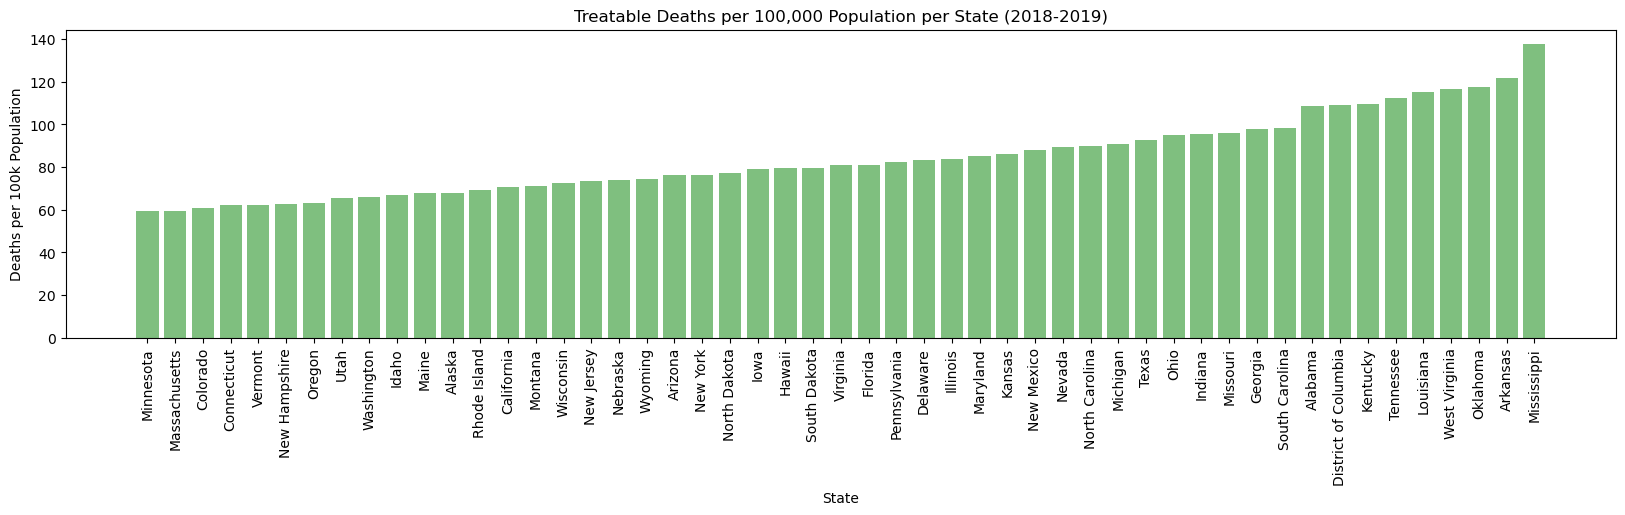

In [40]:
# Bar chart treatable deaths per state sorted
x_axis = np.arange(len(treat_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, treat_sorted["Treatable Deaths per 100k Population"], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, treat_sorted["State"], rotation="vertical")
plt.title('Treatable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

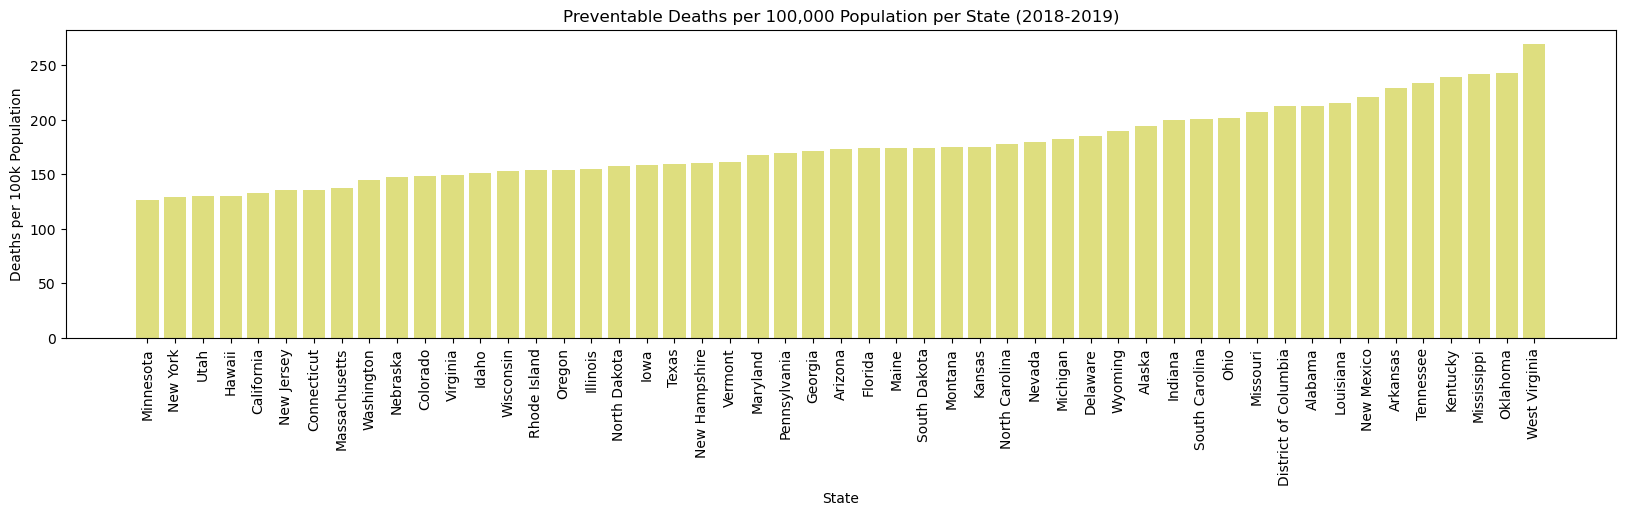

In [41]:
# Bar chart Preventable deaths per state sorted
x_axis = np.arange(len(prev_sorted))
tick_locations = [State for State in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, prev_sorted["Preventable Deaths per 100k Population"], color='y', alpha=0.5, align="center")
plt.xticks(tick_locations, prev_sorted["State"], rotation="vertical")
plt.title('Preventable Deaths per 100,000 Population per State (2018-2019)')
plt.xlabel('State')
plt.ylabel('Deaths per 100k Population')
plt.show()

In [42]:
# verifying the index to prep for use of iloc
# Reminder: this is a zero index
merged_data.columns

Index(['State', 'Percentage of Uninsured Adults',
       'Percentage of Adults visit Reg Doctors',
       'Avoidable Deaths per 100k Population',
       'Treatable Deaths per 100k Population',
       'Preventable Deaths per 100k Population'],
      dtype='object')

In [43]:
# Easier visual for counting index for use with iloc
merged_data.head(0)

,State,Percentage of Uninsured Adults,Percentage of Adults visit Reg Doctors,Avoidable Deaths per 100k Population,Treatable Deaths per 100k Population,Preventable Deaths per 100k Population


The correlation between both factors is -0.69


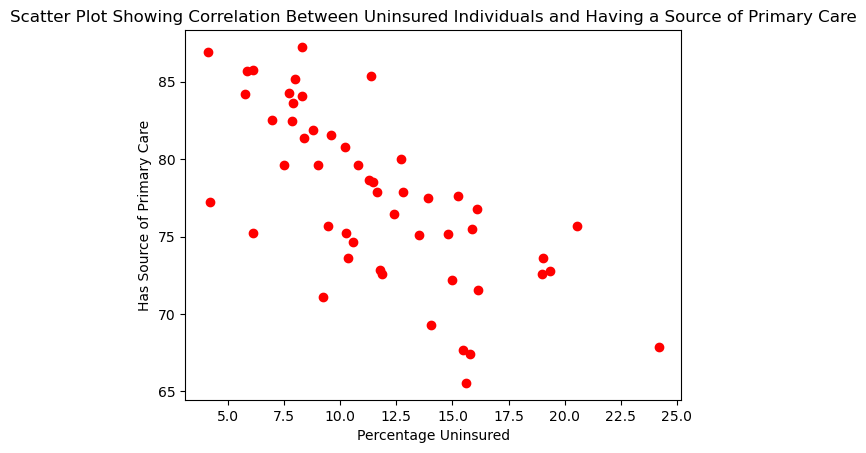

In [44]:
# Correlation between uninsured and has primary care doc
x_uninsured = merged_data.iloc[:,1] 
y_has_doc = merged_data.iloc[:,2] 
correlation = st.pearsonr(x_uninsured,y_has_doc) 
plt.scatter(x_uninsured,y_has_doc,color='red') 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Has Source of Primary Care')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Having a Source of Primary Care')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

# Results: HIGH negative coorelation
# If uninsured, much less likely to have a source of primary care

The correlation between both factors is -0.12


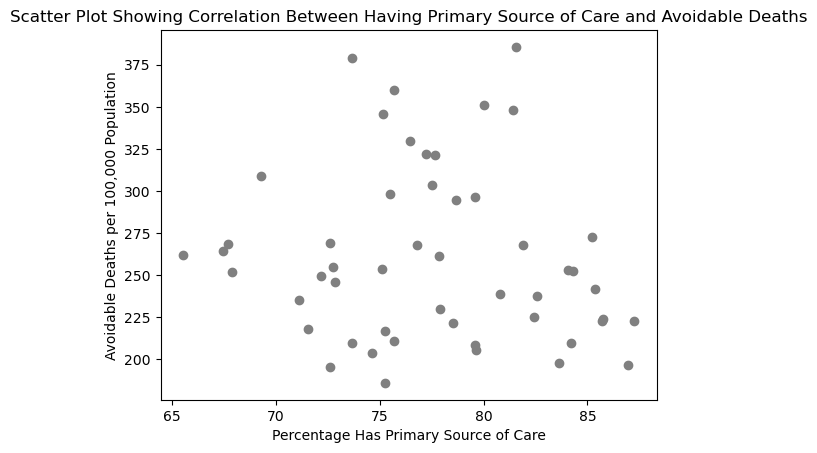

In [45]:
# Correlation between having primary care and avoidable deaths
x_has_doc = merged_data.iloc[:,2] 
y_avoi_deaths = merged_data.iloc[:,3] 
correlation = st.pearsonr(x_has_doc,y_avoi_deaths) 
plt.scatter(x_has_doc,y_avoi_deaths,color="gray") 
plt.xlabel('Percentage Has Primary Source of Care') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Having Primary Source of Care and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.38


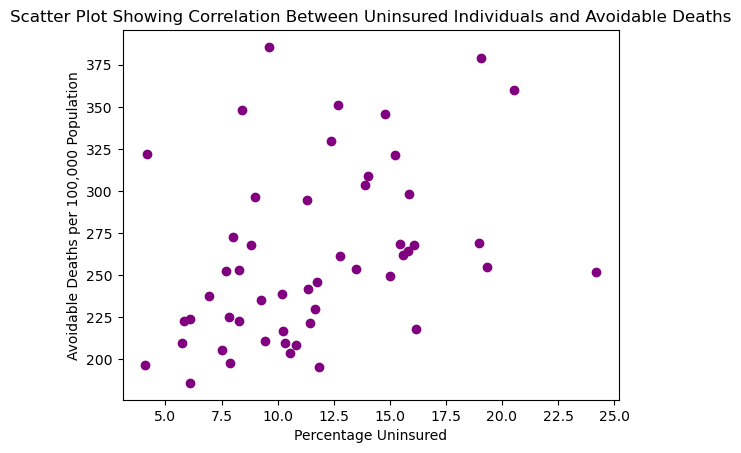

In [46]:
# Correlation between uninsured and avoidable deaths
x_uninsured = merged_data.iloc[:,1] 
y_avoi_deaths = merged_data.iloc[:,3] 
correlation = st.pearsonr(x_uninsured,y_avoi_deaths) 
plt.scatter(x_uninsured,y_avoi_deaths,color="purple") 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Avoidable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Avoidable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is -0.09


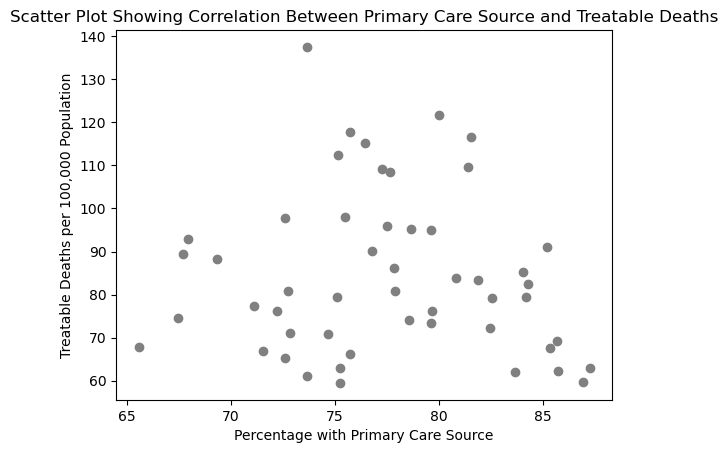

In [47]:
# correlation between having primary care soruce and treatable deaths
x_has_doc = merged_data.iloc[:,2]
y_treat_deaths = merged_data.iloc[:,4] 
correlation = st.pearsonr(x_has_doc,y_treat_deaths) 
plt.scatter(x_has_doc,y_treat_deaths,color='gray') 
plt.xlabel('Percentage with Primary Care Source') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Primary Care Source and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.39


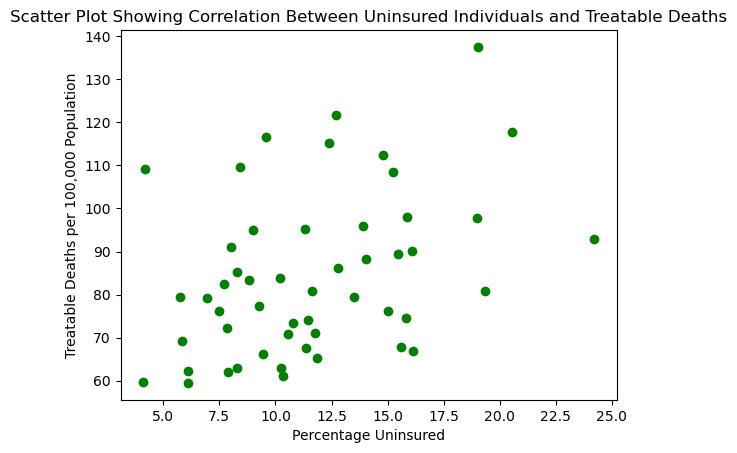

In [48]:
# correlation between percentage uninsured and treatable deaths
# Technically we don't need to specify x_uninsured multiple times
# but keeping it to keep all lines needed to create the visual
x_uninsured = merged_data.iloc[:,1] 
y_treat_deaths = merged_data.iloc[:,4] 
correlation = st.pearsonr(x_uninsured,y_treat_deaths) 
plt.scatter(x_uninsured,y_treat_deaths,color="green") 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Treatable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Treatable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is -0.13


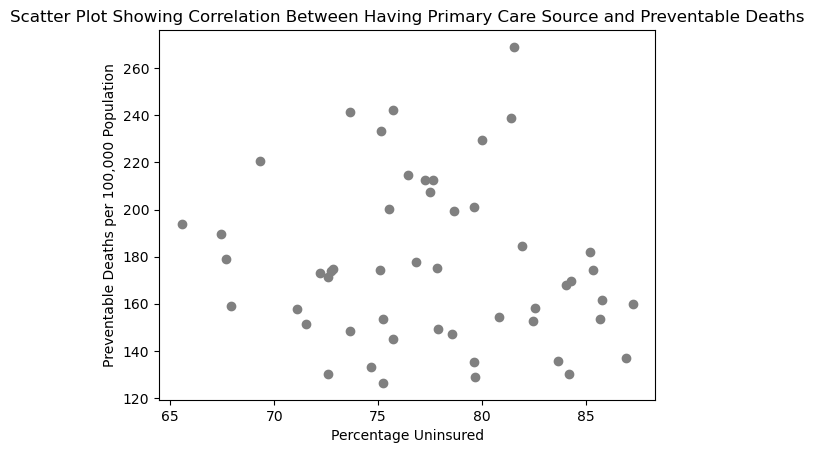

In [50]:
# correlation between having primary care and preventable deaths
x_has_doc = merged_data.iloc[:,2]
y_prev_deaths = merged_data.iloc[:,5] 
correlation = st.pearsonr(x_has_doc,y_prev_deaths) 
plt.scatter(x_has_doc,y_prev_deaths,color="gray") 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Having Primary Care Source and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

The correlation between both factors is 0.35


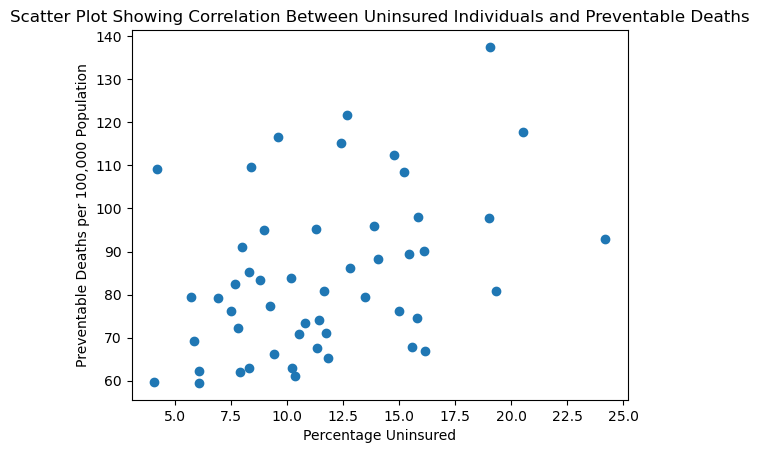

In [51]:
# correlation between uninsured and preventable deaths
x_uninsured = merged_data.iloc[:,1] 
y_prev_deaths = merged_data.iloc[:,5] 
correlation = st.pearsonr(x_uninsured,y_prev_deaths) 
plt.scatter(x_uninsured,y_treat_deaths) 
plt.xlabel('Percentage Uninsured') 
plt.ylabel('Preventable Deaths per 100,000 Population')
plt.title('Scatter Plot Showing Correlation Between Uninsured Individuals and Preventable Deaths')
print(f"The correlation between both factors is {round(correlation[0],2)}") 
plt.show()

In [ ]:
# Lastest update pushed
# ELaine - 2/4/2024 - 10:16 pm